In [ ]:
import numpy as np
import mpmath as mp
import math
import matplotlib as mpl
import scipy.special as ss
from matplotlib import pyplot as plt
import time

In [ ]:
#Parametros generales
h=6.62607004e-34
hb=h/(2*np.pi)
kb=1.38064852e-23
m=3.817545e-26
V=5.84333746920601e-9
N0=1e7
T0=5e-5

In [ ]:
def f(x):
  lam=mp.sqrt(h**2/(2*mp.pi*m*kb*T0))
  F =-(V/lam**3)*mp.polylog(3/2,-mp.exp(x))-N0
  return F
def df(x):
  lam=mp.sqrt(h**2/(2*mp.pi*m*kb*T0))
  der=-(V/lam**3)*mp.polylog(1/2,-mp.exp(x))
  return der
def b(x):
  lam=mp.sqrt(h**2/(2*mp.pi*m*kb*T0))
  F=(V/lam**3)*mp.polylog(3/2,mp.exp(x))-N0
  return F
def db(x):
  lam=mp.sqrt(h**2/(2*mp.pi*m*kb*T0))
  der=(V/lam**3)*mp.polylog(1/2,mp.exp(x))
  return der

In [ ]:
def nr_1var(f,df,x1,x2,dx,tol,MAX,n,t):
    while x1<x2:
        f_n=f(x1)
        f_np1=f(x1+dx)
        bracket=f_n*f_np1
        if bracket<0:
            x_n=x1
            step=1
            while True:
                x_nm1=x_n
                x_np1=x_n-(f(x_n)/df(x_n))
                x_n=x_np1
                step+=1
                if abs(x_n-x_nm1)<tol or step==MAX:
                    break
            return float(mp.nstr(x_n,20))
        x1=x1+dx

In [ ]:
evap_cool_b={'N':[],'T':[],'E':[],'Mu':[],'Q':[],'Nf':[],'Tf':[]}
evap_cool_f={'N':[],'T':[],'E':[],'Mu':[],'Q':[],'Nf':[],'Tf':[]}
evap_cool_mb={'N':[],'T':[],'Q':[],'Nf':[],'Tf':[]}

In [ ]:
#bosones
start1 = time.time()
print('Inicio')
n1=nr_1var(b,db,-15.5,-15,0.00001,0.0000001,10000,N0,T0)
mu0_b=n1*kb*T0
end1 = time.time() 
print(end1-start1)
print(n1,mu0_b)
e0_b=(3/2)*N0*kb*T0*(mp.polylog(5/2,mp.exp(mu0_b/(kb*T0)))/mp.polylog(3/2,mp.exp(mu0_b/(kb*T0))))
print(e0_b)


Inicio
23.32669425010681
-15.269405826004512 -1.0540841277476254e-26
1.03548634722887e-20


In [ ]:
print(e0_b/kb)
print(5e-28/kb)
lamba=mp.sqrt(h**2/(2*mp.pi*m*kb*1e-9))
print((1/2.61238)*N0*(lamba**3))
print((9.999000000000002e-31**2)/(2*m*kb*T0))
print(mp.sqrt(h**2/(2*mp.pi*m*kb*T0)))

749.999969020984
3.621486517075324e-05
5.84333746920601e-9
1.8969061299797513e-08
5.14929102185127e-8


In [ ]:
#fermiones
start2 = time.time()
print('Inicio')
n2=nr_1var(f,df,-15.5,-15,0.00001,0.0000001,10000,N0,T0)
mu0_f=n2*kb*T0
end2 = time.time() 
print(end2-start2)
print(n2,mu0_f)
e0_f=(3/2)*N0*kb*T0*(mp.polylog(5/2,-mp.exp(mu0_b/(kb*T0)))/mp.polylog(3/2,-mp.exp(mu0_b/(kb*T0))))
print(e0_f)

Inicio
12.811874151229858
-15.269405660783093 -1.05408411634199e-26
1.03548643277113e-20


In [ ]:
evap_cool_mb['N'].append(N0)
evap_cool_mb['T'].append(T0)

In [ ]:
evap_cool_b['N'].append(N0)
evap_cool_b['T'].append(T0)
evap_cool_b['Mu'].append(mu0_b)
evap_cool_b['E'].append(e0_b)

In [ ]:
evap_cool_f['N'].append(N0)
evap_cool_f['T'].append(T0)
evap_cool_f['Mu'].append(mu0_f)
evap_cool_f['E'].append(e0_f)

In [ ]:
Qc0=5e-4 ##Kelvins
dqc=1e-7 ##Kelvins
#Qc0=1e-26
#dqc=1e-35
for i in range(1,10001):
    evap_cool_b['Q'].append(Qc0-i*dqc)
    evap_cool_f['Q'].append(Qc0-i*dqc)
    evap_cool_mb['Q'].append(Qc0-i*dqc)

In [ ]:
#evap_cool_b['Q'].clear()
#evap_cool_f['Q'].clear()
#evap_cool_mb['Q'].clear()

In [ ]:
#evap_cool_b['N'].clear()
#evap_cool_f['N'].clear()
#evap_cool_b['Nf'].clear()
#evap_cool_f['Nf'].clear()
#evap_cool_b['E'].clear()
#evap_cool_f['E'].clear()
#evap_cool_b['T'].clear()
#evap_cool_b['Tf'].clear()
#evap_cool_f['T'].clear()
#evap_cool_f['Tf'].clear()
#evap_cool_b['Mu'].clear()
#evap_cool_f['Mu'].clear()
#evap_cool_b['Q'].clear()
#evap_cool_f['Q'].clear()

In [ ]:
print(evap_cool_b['Q'][0],evap_cool_b['Q'][1])

0.0004999000000000001 0.0004998


In [ ]:
#for i in range(1,201):
  #evap_cool_mb['Q'].append(Qc0-i*dqc)

## Método de Newton-Raphson de dos variables.



In [ ]:
def nr_2var_b(x1,y1,dx,dy,Ni,Ei):
  def f(Ti,mui):
      lam=mp.sqrt(h**2/(2*mp.pi*m*kb*Ti))
      F=(V/lam**3)*mp.polylog(3/2,mp.exp(mui/(kb*Ti)))-Ni
      return F
  def g(Ti,mui):
      G=((3/2)*Ni*kb*Ti*(mp.polylog(5/2,mp.exp(mui/(kb*Ti)))/mp.polylog(3/2,mp.exp(mui/(kb*Ti)))))-Ei
      return G
  def f_y(Ti,mui):
      F_mui=(2*mp.sqrt(2)*(mp.pi)**(3/2)*V*mp.polylog(1/2,mp.exp(mui/(kb*Ti))))/(kb*(h**2/(kb*m*Ti))**(3/2)*Ti)
      return F_mui
  def f_x(Ti,mui):
      t1=(3*mp.sqrt(2)*(h**2)*(mp.pi**(3/2))*V*mp.polylog(3/2,mp.exp(mui/(kb*Ti))))/(kb*m*(Ti**2)*(h**2/(kb*m*Ti))**(5/2))
      t2=(2*mp.sqrt(2)*(mui)*(mp.pi**(3/2))*V*mp.polylog(1/2,mp.exp(mui/(kb*Ti))))/(kb*(Ti**2)*(h**2/(kb*m*Ti))**(3/2))
      F_Ti=t1-t2
      return F_Ti
  def g_y(Ti,mui):
      t1=((3*Ni)/2)
      t2=(3*Ni*mp.polylog(1/2,mp.exp(mui/(kb*Ti)))*mp.polylog(5/2,mp.exp(mui/(kb*Ti))))/(2*(mp.polylog(3/2,mp.exp(mui/(kb*Ti))))**2)
      G_mui=t1-t2
      return G_mui
  def g_x(Ti,mui):
      t1=(3*mui*Ni)/(2*Ti)
      t2=(3*mui*Ni*mp.polylog(1/2,mp.exp(mui/(kb*Ti)))*mp.polylog(5/2,mp.exp(mui/(kb*Ti))))/(2*Ti*(mp.polylog(3/2,mp.exp(mui/(kb*Ti))))**2)
      t3=(3*kb*Ni*mp.polylog(5/2,mp.exp(mui/(kb*Ti))))/(2*mp.polylog(3/2,mp.exp(mui/(kb*Ti))))
      G_Ti=-t1+t2+t3
      return G_Ti
  x_n=x1+dx
  y_n=y1-dy
  x_np1= x_n + ((f_y(x_n,y_n)*g(x_n,y_n)-f(x_n,y_n)*g_y(x_n,y_n))/(f_x(x_n,y_n)*g_y(x_n,y_n)- f_y(x_n,y_n)*g_x(x_n,y_n)))
  y_np1= y_n + ((f(x_n,y_n)*g_x(x_n,y_n)-f_x(x_n,y_n)*g(x_n,y_n))/(f_x(x_n,y_n)*g_y(x_n,y_n)- f_y(x_n,y_n)*g_x(x_n,y_n)))
  return [x_np1,y_np1]
  #return [float(mp.nstr(x_np1,20)),float(mp.nstr(y_np1,20))]

In [ ]:
def nr_2var_f(x1,y1,dx,dy,Ni,Ei):
  def f(Ti,mui):
      lam=mp.sqrt(h**2/(2*mp.pi*m*kb*Ti))
      F=-(V/lam**3)*mp.polylog(3/2,-mp.exp(mui/(kb*Ti)))-Ni
      return F
  def g(Ti,mui):
      G=((3/2)*Ni*kb*Ti*(mp.polylog(5/2,-mp.exp(mui/(kb*Ti)))/mp.polylog(3/2,-mp.exp(mui/(kb*Ti)))))-Ei
      return G
  def f_y(Ti,mui):
      F_mui=-(2*mp.sqrt(2)*(mp.pi)**(3/2)*V*mp.polylog(1/2,-mp.exp(mui/(kb*Ti))))/(kb*(h**2/(kb*m*Ti))**(3/2)*Ti)
      return F_mui
  def f_x(Ti,mui):
      t1=(3*mp.sqrt(2)*(h**2)*(mp.pi**(3/2))*V*mp.polylog(3/2,-mp.exp(mui/(kb*Ti))))/(kb*m*(Ti**2)*(h**2/(kb*m*Ti))**(5/2))
      t2=(2*mp.sqrt(2)*(mui)*(mp.pi**(3/2))*V*mp.polylog(1/2,-mp.exp(mui/(kb*Ti))))/(kb*(Ti**2)*(h**2/(kb*m*Ti))**(3/2))
      F_Ti=-t1+t2
      return F_Ti
  def g_y(Ti,mui):
      t1=((3*Ni)/2)
      t2=(3*Ni*mp.polylog(1/2,-mp.exp(mui/(kb*Ti)))*mp.polylog(5/2,-mp.exp(mui/(kb*Ti))))/(2*(mp.polylog(3/2,-mp.exp(mui/(kb*Ti))))**2)
      G_mui=t1-t2
      return G_mui
  def g_x(Ti,mui):
      t1=(3*mui*Ni)/(2*Ti)
      t2=(3*mui*Ni*mp.polylog(1/2,-mp.exp(mui/(kb*Ti)))*mp.polylog(5/2,-mp.exp(mui/(kb*Ti))))/(2*Ti*(mp.polylog(3/2,-mp.exp(mui/(kb*Ti))))**2)
      t3=(3*kb*Ni*mp.polylog(5/2,-mp.exp(mui/(kb*Ti))))/(2*mp.polylog(3/2,-mp.exp(mui/(kb*Ti))))
      G_Ti=-t1+t2+t3
      return G_Ti
  x_n=x1+dx
  y_n=y1-dy
  x_np1= x_n + ((f_y(x_n,y_n)*g(x_n,y_n)-f(x_n,y_n)*g_y(x_n,y_n))/(f_x(x_n,y_n)*g_y(x_n,y_n)- f_y(x_n,y_n)*g_x(x_n,y_n)))
  y_np1= y_n + ((f(x_n,y_n)*g_x(x_n,y_n)-f_x(x_n,y_n)*g(x_n,y_n))/(f_x(x_n,y_n)*g_y(x_n,y_n)- f_y(x_n,y_n)*g_x(x_n,y_n)))
  return [x_np1,y_np1]

# Proceso recursivo.

Funciones recursivas para fermiones.

In [ ]:
def nf(Ni,Ti,Mui,qc):
  etac=qc/Ti
  g32t=-mp.polylog(3/2,-mp.exp(Mui/(kb*Ti))*math.erf(mp.sqrt(etac)))
  g32=-mp.polylog(3/2,-mp.exp(Mui/(kb*Ti)))
  g1b=-mp.polylog(1,-mp.exp(Mui/(kb*Ti) - etac))
  N1= (g32t/g32 - (2/np.sqrt(mp.pi))*np.sqrt(etac)*(g1b/g32))*Ni
  return N1

def ef(Ni,Ti,Mui,Ei,qc):
  etac=qc/Ti
  g52t=-mp.polylog(5/2,-mp.exp(Mui/(kb*Ti))*math.erf(mp.sqrt(etac)))
  g52=-mp.polylog(5/2,-mp.exp(Mui/(kb*Ti)))
  g1b=-mp.polylog(1,-mp.exp(Mui/(kb*Ti) - etac))
  g2b=-mp.polylog(2,-mp.exp(Mui/(kb*Ti) - etac))
  E1= ((g52t/g52) - (2/mp.sqrt(np.pi))*mp.sqrt(etac)*(g2b/g52) - (4/(3*mp.sqrt(np.pi)))*(etac**(3/2))*(g1b/g52))*Ei
  return E1

Funciones recursivas para bosones.

In [ ]:
def nb(Ni,Ti,Mui,qc):
  etac=qc/Ti
  #etac=(qc**2)/(2*m*kb*Ti)
  g32t=mp.polylog(3/2,mp.exp(Mui/(kb*Ti))*math.erf(mp.sqrt(etac)))
  g32=mp.polylog(3/2,mp.exp(Mui/(kb*Ti)))
  g1b=mp.polylog(1,mp.exp(Mui/(kb*Ti) - etac))    
  N1= (g32t/g32 - (2/np.sqrt(mp.pi))*np.sqrt(etac)*(g1b/g32))*Ni
  return N1
  #return float(mp.nstr(N1,20))

def eb(Ni,Ti,Mui,Ei,qc):
  etac=qc/Ti
  #etac=(qc**2)/(2*m*kb*Ti)
  g52t=mp.polylog(5/2,mp.exp(Mui/(kb*Ti))*math.erf(mp.sqrt(etac)))
  g52=mp.polylog(5/2,mp.exp(Mui/(kb*Ti)))
  g2b=mp.polylog(2,mp.exp(Mui/(kb*Ti) - etac))
  g1b=mp.polylog(1,mp.exp(Mui/(kb*Ti) - etac))  
  E1= ((g52t/g52) - (2/mp.sqrt(np.pi))*mp.sqrt(etac)*(g2b/g52) - (4/(3*mp.sqrt(np.pi)))*(etac**(3/2))*(g1b/g52))*Ei
  return E1
  #return float(mp.nstr(E1,20))

Funciones de Maxwell-Boltzmann

In [ ]:
def n_mb(n0,TC,t0):
    eta=np.sqrt(TC/t0)
    a1=2/np.sqrt(np.pi)
    f1= ss.erf(eta)-a1*eta*np.exp(-(TC/t0))
    return n0*f1
def t_mb(TC,t0):
    eta=np.sqrt(TC/t0)
    f1=2/np.sqrt(np.pi)
    f2=4/(3*(np.sqrt(np.pi)))
    num=ss.erf(eta)-(f1*eta*np.exp(-TC/t0))-(f2*((TC/t0)**(3/2))*np.exp(-TC/t0))
    den=ss.erf(eta)-(f1*eta*np.exp(-TC/t0))
    return t0*(num/den)

## Valores preeliminares

In [ ]:
def f(Ti,mui,Ni):
  lam=mp.sqrt(h**2/(2*mp.pi*m*kb*Ti))
  F=(V/lam**3)*mp.polylog(3/2,mp.exp(mui/(kb*Ti)))-Ni
  return F
def g(Ti,mui,Ni,Ei):
  G=((3/2)*Ni*kb*Ti*(mp.polylog(5/2,mp.exp(mui/(kb*Ti)))/mp.polylog(3/2,mp.exp(mui/(kb*Ti)))))-Ei
  return G
def f_y(Ti,mui):
  F_mui=(2*mp.sqrt(2)*(mp.pi)**(3/2)*V*mp.polylog(1/2,mp.exp(mui/(kb*Ti))))/(kb*(h**2/(kb*m*Ti))**(3/2)*Ti)
  return F_mui
def f_x(Ti,mui):
  t1=(3*mp.sqrt(2)*(h**2)*(mp.pi**(3/2))*V*mp.polylog(3/2,mp.exp(mui/(kb*Ti))))/(kb*m*(Ti**2)*(h**2/(kb*m*Ti))**(5/2))
  t2=(2*mp.sqrt(2)*(mui)*(mp.pi**(3/2))*V*mp.polylog(1/2,mp.exp(mui/(kb*Ti))))/(kb*(Ti**2)*(h**2/(kb*m*Ti))**(3/2))
  F_Ti=t1-t2
  return F_Ti
def g_y(Ti,mui,Ni):
  t1=((3*Ni)/2)
  t2=(3*Ni*mp.polylog(1/2,mp.exp(mui/(kb*Ti)))*mp.polylog(5/2,mp.exp(mui/(kb*Ti))))/(2*(mp.polylog(3/2,mp.exp(mui/(kb*Ti))))**2)
  G_mui=t1-t2
  return G_mui
def g_x(Ti,mui,Ni):
  t1=(3*mui*Ni)/(2*Ti)
  t2=(3*mui*Ni*mp.polylog(1/2,mp.exp(mui/(kb*Ti)))*mp.polylog(5/2,mp.exp(mui/(kb*Ti))))/(2*Ti*(mp.polylog(3/2,mp.exp(mui/(kb*Ti))))**2)
  t3=(3*kb*Ni*mp.polylog(5/2,mp.exp(mui/(kb*Ti))))/(2*mp.polylog(3/2,mp.exp(mui/(kb*Ti))))
  G_Ti=-t1+t2+t3
  return G_Ti

In [ ]:
n1=nb(evap_cool_b['N'][0],evap_cool_b['T'][0],evap_cool_b['Mu'][0],evap_cool_b['Q'][0])
e1=eb(evap_cool_b['N'][0],evap_cool_b['T'][0],evap_cool_b['Mu'][0],evap_cool_b['E'][0],evap_cool_b['Q'][0])
dx=1e-20
dy=1e-30
x_n=T0+dx
y_n=mu0_b-dy
t1=x_n + ((f_y(x_n,y_n)*g(x_n,y_n,n1,e1)-f(x_n,y_n,n1)*g_y(x_n,y_n,n1))/(f_x(x_n,y_n)*g_y(x_n,y_n,n1)- f_y(x_n,y_n)*g_x(x_n,y_n,n1)))
mu1=y_n + ((f(x_n,y_n,n1)*g_x(x_n,y_n,n1)-f_x(x_n,y_n)*g(x_n,y_n,n1,e1))/(f_x(x_n,y_n)*g_y(x_n,y_n,n1)- f_y(x_n,y_n)*g_x(x_n,y_n,n1)))
print(n1,e1,t1,mu1)

9998299.33272181 1.03419002981373e-20 4.99458995222361e-5 -1.05284313451289e-26


In [ ]:
n2=nb(n1,t1,mu1,evap_cool_b['Q'][2])
e2=eb(n1,t1,mu1,e1,evap_cool_b['Q'][2])
dx=1e-20
dy=1e-30
x_n=t1-dx
y_n=mu1-dy
t2=x_n + ((f_y(x_n,y_n)*g(x_n,y_n,n1,e1)-f(x_n,y_n,n1)*g_y(x_n,y_n,n1))/(f_x(x_n,y_n)*g_y(x_n,y_n,n1)- f_y(x_n,y_n)*g_x(x_n,y_n,n1)))
mu2=y_n + ((f(x_n,y_n,n1)*g_x(x_n,y_n,n1)-f_x(x_n,y_n)*g(x_n,y_n,n1,e1))/(f_x(x_n,y_n)*g_y(x_n,y_n,n1)- f_y(x_n,y_n)*g_x(x_n,y_n,n1)))
print(n2,e2,t2,mu2)

9996609.99488035 1.03290294939929e-20 4.99458995222384e-5 -1.05284327485535e-26


# Simulación de recursividad

In [ ]:
for i in range(0,4999):
  evap_cool_b['N'].append(nb(evap_cool_b['N'][i],evap_cool_b['T'][i],evap_cool_b['Mu'][i],evap_cool_b['Q'][i]))
  evap_cool_b['Nf'].append(evap_cool_b['N'][i]/N0)
  evap_cool_b['E'].append(eb(evap_cool_b['N'][i],evap_cool_b['T'][i],evap_cool_b['Mu'][i],evap_cool_b['E'][i],evap_cool_b['Q'][i]))
  t_mub=nr_2var_b(evap_cool_b['T'][i],evap_cool_b['Mu'][i],1e-20,1e-30,evap_cool_b['N'][i+1],evap_cool_b['E'][i+1])##e-20 y e-30
  evap_cool_b['T'].append(t_mub[0])
  evap_cool_b['Tf'].append(evap_cool_b['T'][i]/T0)
  evap_cool_b['Mu'].append(t_mub[1])

In [ ]:
for i in range(0,4999):
  evap_cool_f['N'].append(nf(evap_cool_f['N'][i],evap_cool_f['T'][i],evap_cool_f['Mu'][i],evap_cool_f['Q'][i]))
  evap_cool_f['Nf'].append(evap_cool_f['N'][i]/N0)
  evap_cool_f['E'].append(ef(evap_cool_f['N'][i],evap_cool_f['T'][i],evap_cool_f['Mu'][i],evap_cool_f['E'][i],evap_cool_f['Q'][i]))
  t_muf=nr_2var_f(evap_cool_f['T'][i],evap_cool_f['Mu'][i],1e-20,1e-30,evap_cool_f['N'][i+1],evap_cool_f['E'][i+1])##e-20 y e-30
  evap_cool_f['T'].append(t_muf[0])
  evap_cool_f['Tf'].append(evap_cool_f['T'][i]/T0)
  evap_cool_f['Mu'].append(t_muf[1])

In [ ]:
#print(evap_cool_f['N'])
#print(evap_cool_f['Mu'])

In [ ]:
for i in range(0,5000):
  evap_cool_mb['N'].append(n_mb(evap_cool_mb['N'][i],evap_cool_mb['Q'][i],evap_cool_mb['T'][i]))
  evap_cool_mb['T'].append(t_mb(evap_cool_mb['Q'][i],evap_cool_mb['T'][i]))
  evap_cool_mb['Nf'].append(evap_cool_mb['N'][i]/N0)
  evap_cool_mb['Tf'].append(evap_cool_mb['T'][i]/T0)

<ipython-input-21-44501dce8253>:12: RuntimeWarning: invalid value encountered in double_scalars
  return t0*(num/den)


In [ ]:
#print(evap_cool_mb['T'][4990:5002])
#print('BE',evap_cool_b['T'][4990:5001])
#print(len(evap_cool_mb['Tf']))
#print('FD',evap_cool_f['T'][4990:5001])
#print('MB',evap_cool_mb['N'][9990:10000])
print(len(evap_cool_mb['N']))

5001


In [ ]:
import pandas
caja_t_vs_q_mb = pandas.DataFrame(data={"Q[K]":evap_cool_mb['Q'][0:5001],"T_MB[K]":evap_cool_mb['T']})
caja_t_vs_q_be = pandas.DataFrame(data={"Q[K]":evap_cool_b['Q'][0:5000],"T_BE[K]":evap_cool_b['T']})
caja_t_vs_q_fd = pandas.DataFrame(data={"Q[K]":evap_cool_f['Q'][0:5000],"T_FD[K]":evap_cool_f['T']})
caja_n_vs_q_mb = pandas.DataFrame(data={"Q[K]":evap_cool_mb['Q'][0:5001],"N_MB":evap_cool_mb['N']})
caja_n_vs_q_be = pandas.DataFrame(data={"Q[K]":evap_cool_b['Q'][0:5000],"N_BE":evap_cool_b['N']})
caja_n_vs_q_fd = pandas.DataFrame(data={"Q[K]":evap_cool_f['Q'][0:5000],"N_FD":evap_cool_f['N']})
caja_t_vs_n_mb = pandas.DataFrame(data={"T_MB[K]": evap_cool_mb['T'],"N_MB": evap_cool_mb['N']})
caja_t_vs_n_be = pandas.DataFrame(data={"T_BE[K]":evap_cool_b['T'],"N_BE":evap_cool_b['N']})
caja_t_vs_n_fd = pandas.DataFrame(data={"T_FD[K]":evap_cool_f['T'],"N_FD":evap_cool_f['N']})
caja_t_vs_q_mb.to_csv("./file.csv", sep=',',index=False)
caja_t_vs_q_be.to_csv("./file.csv", sep=',',index=False)
caja_t_vs_q_fd.to_csv("./file.csv", sep=',',index=False)
caja_n_vs_q_mb.to_csv("./file.csv", sep=',',index=False)
caja_n_vs_q_be.to_csv("./file.csv", sep=',',index=False)
caja_n_vs_q_fd.to_csv("./file.csv", sep=',',index=False)
caja_t_vs_n_mb.to_csv("./file.csv", sep=',',index=False)
caja_t_vs_n_be.to_csv("./file.csv", sep=',',index=False)
caja_t_vs_n_fd.to_csv("./file.csv", sep=',',index=False)

# Gráficas.

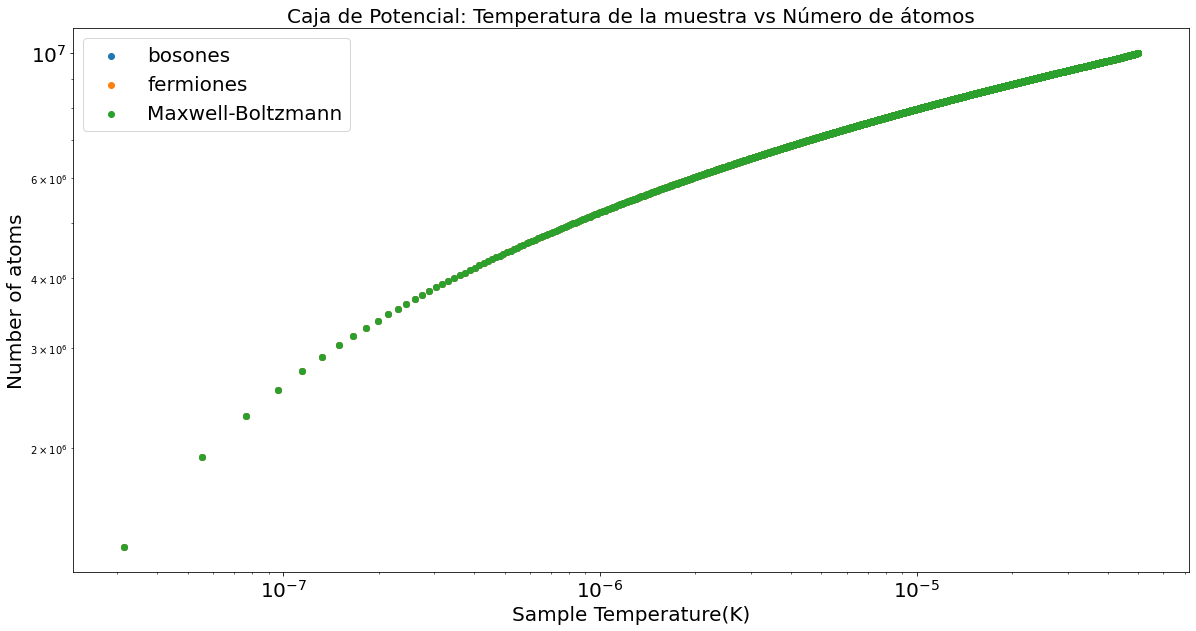

In [ ]:
plt.figure(figsize=(20,10))

plt.scatter(evap_cool_b['T'][0:5000],evap_cool_b['N'][0:5000],label='bosones')
plt.scatter(evap_cool_f['T'][0:5000],evap_cool_f['N'][0:5000], label='fermiones')
plt.scatter(evap_cool_mb['T'],evap_cool_mb['N'], label='Maxwell-Boltzmann')
#plt.xlim(0,0.5e-6)
#plt.ylim(0,4e6)
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Sample Temperature(K)',fontsize=20)
plt.ylabel('Number of atoms',fontsize=20)

plt.title("Caja de Potencial: Temperatura de la muestra vs Número de átomos", fontsize=20)

plt.legend(fontsize=20)
plt.tick_params(axis='both', labelsize=20)

#plt.savefig('figurita_nueva.jpg')

plt.show()

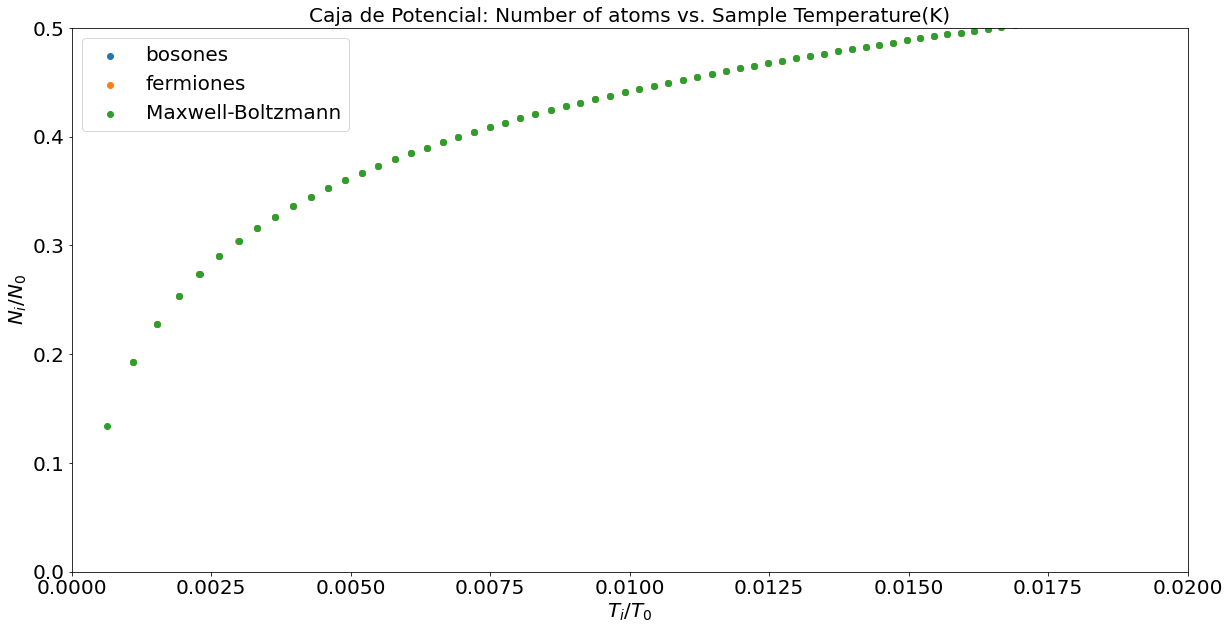

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(evap_cool_b['Tf'][0:4999],evap_cool_b['Nf'][0:4999],label='bosones')
plt.scatter(evap_cool_f['Tf'][0:4999],evap_cool_f['Nf'][0:4999],label='fermiones')
plt.scatter(evap_cool_mb['Tf'],evap_cool_mb['Nf'], label='Maxwell-Boltzmann')
plt.xlim(0,0.02)
plt.ylim(0,0.5)
#plt.xscale('log')
#plt.yscale('log')

plt.xlabel('$T_i/T_0$',fontsize=20)
plt.ylabel('$N_i/N_0$',fontsize=20)

plt.title("Caja de Potencial: Number of atoms vs. Sample Temperature(K)", fontsize=20)

plt.legend(fontsize=20)
plt.tick_params(axis='both', labelsize=20)

#plt.savefig('figurita_nueva.jpg')

plt.show()

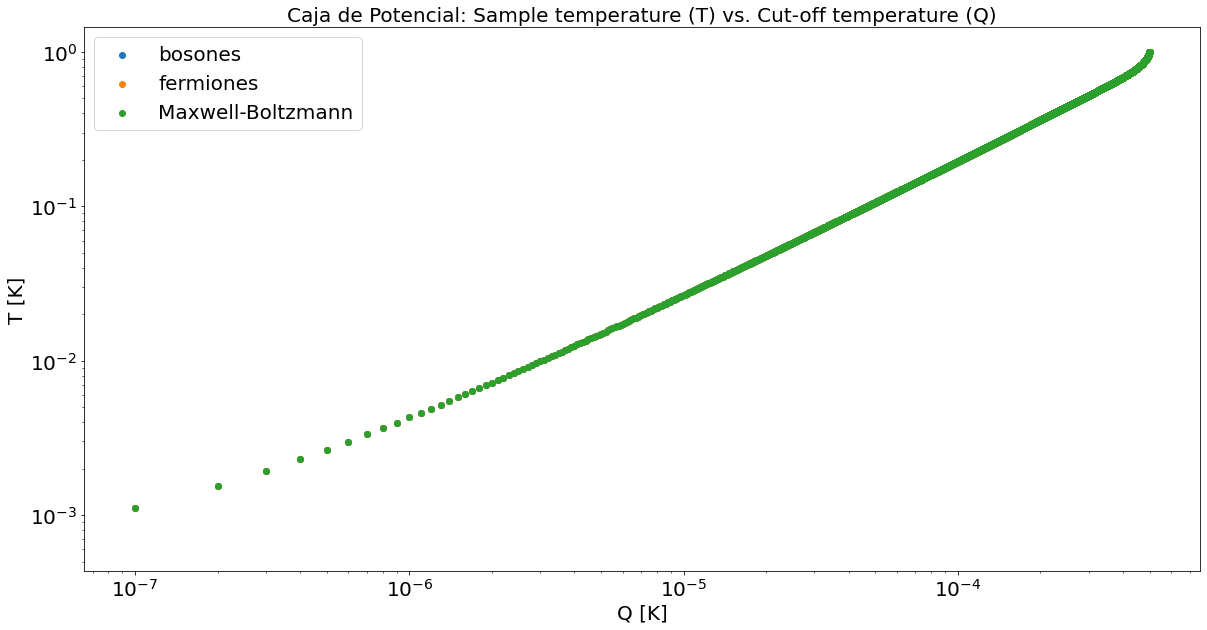

In [ ]:
plt.figure(figsize=(20,10))

plt.scatter(evap_cool_b['Q'][0:4999],evap_cool_b['Tf'][0:4999],label='bosones')
plt.scatter(evap_cool_f['Q'][0:4999],evap_cool_f['Tf'][0:4999],label='fermiones')
plt.scatter(evap_cool_mb['Q'][0:5000],evap_cool_mb['Tf'], label='Maxwell-Boltzmann')
#plt.xlim(3.5e-7,10e-7)
#plt.ylim(0,10000)
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Q [K]',fontsize=20)
plt.ylabel('T [K]',fontsize=20)

plt.title("Caja de Potencial: Sample temperature (T) vs. Cut-off temperature (Q)", fontsize=20)

plt.legend(fontsize=20)
plt.tick_params(axis='both', labelsize=20)

#plt.savefig('figurita_nueva.jpg')

plt.show()

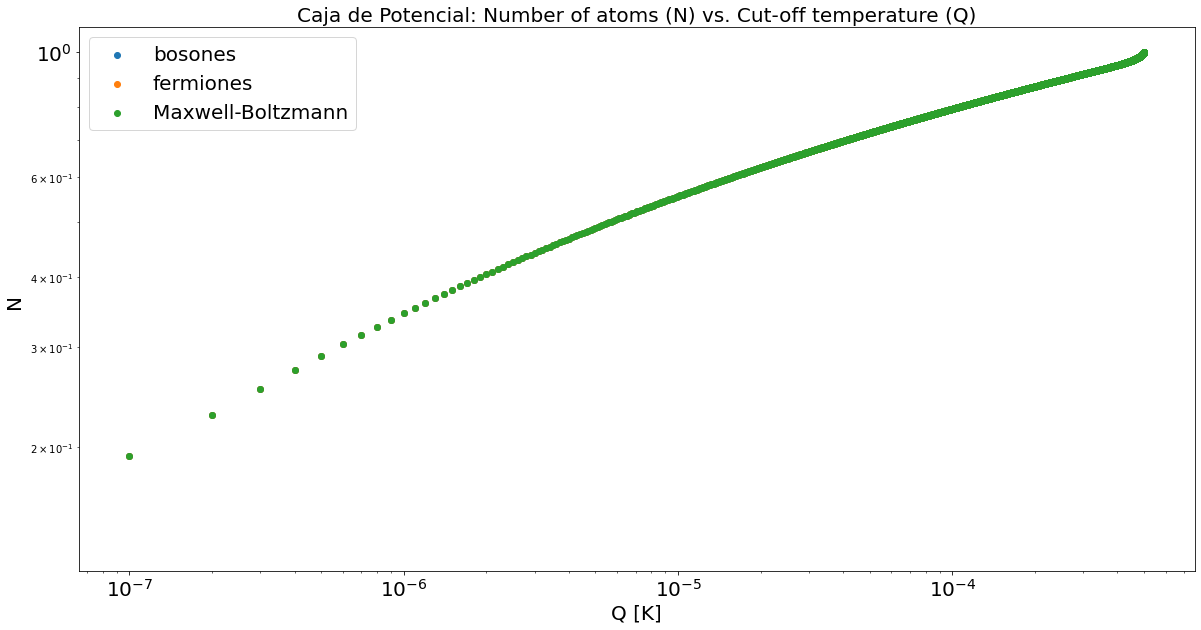

In [ ]:
plt.figure(figsize=(20,10))

plt.scatter(evap_cool_b['Q'][0:4999],evap_cool_b['Nf'][0:4999],label='bosones')
plt.scatter(evap_cool_f['Q'][0:4999],evap_cool_f['Nf'][0:4999],label='fermiones')
plt.scatter(evap_cool_mb['Q'][0:5000],evap_cool_mb['Nf'], label='Maxwell-Boltzmann')
#plt.xlim(3.5e-7,10e-7)
#plt.ylim(0,10000)
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Q [K]',fontsize=20)
plt.ylabel('N ',fontsize=20)

plt.title("Caja de Potencial: Number of atoms (N) vs. Cut-off temperature (Q)", fontsize=20)

plt.legend(fontsize=20)
plt.tick_params(axis='both', labelsize=20)

#plt.savefig('figurita_nueva.jpg')

plt.show()

ValueError: ignored

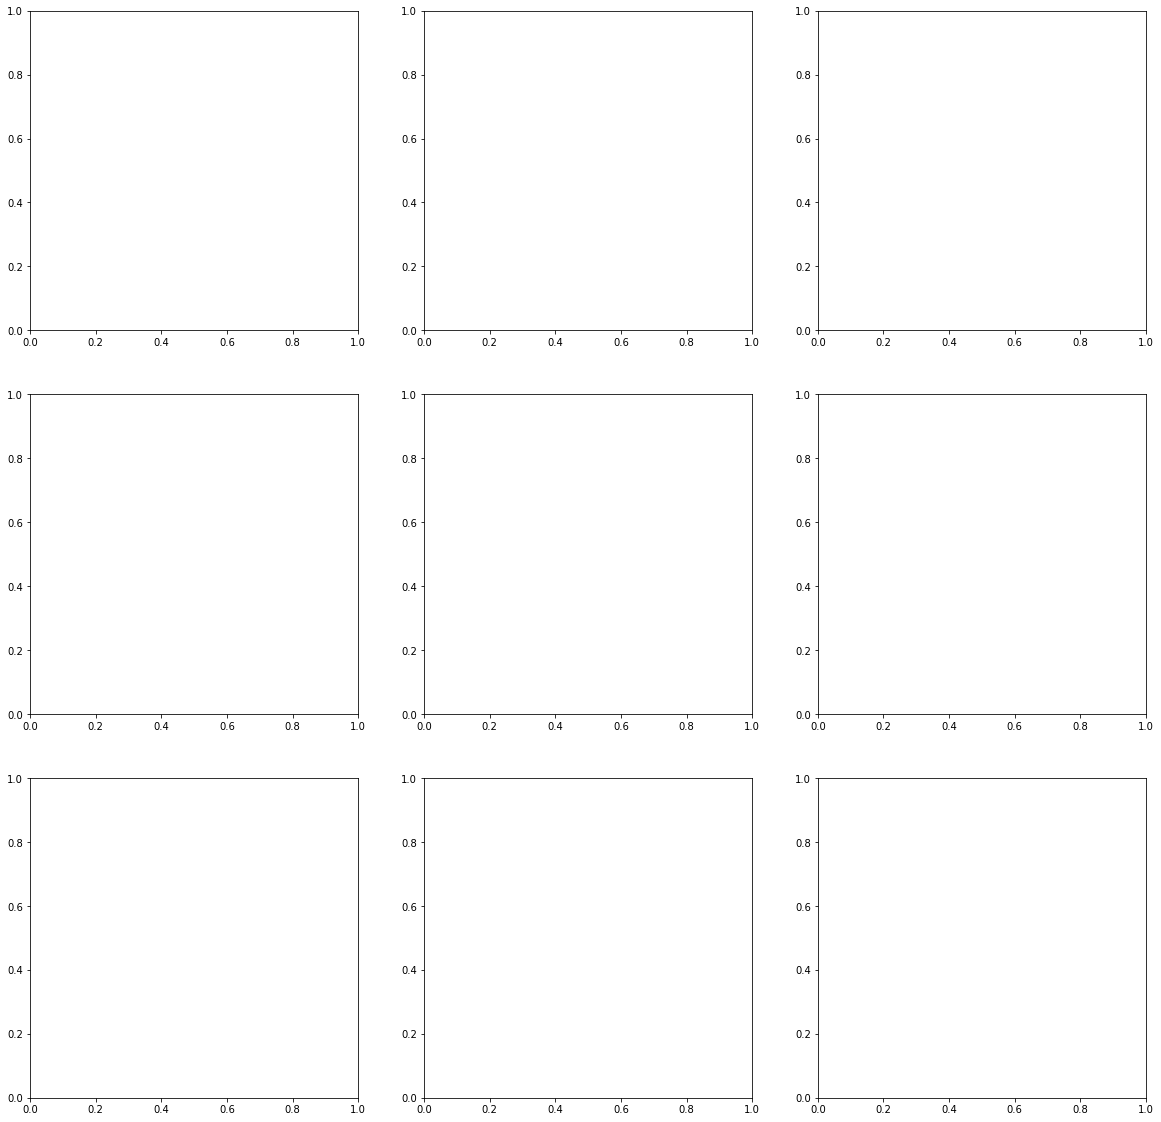

In [ ]:
fig,axs=plt.subplots(3,3,figsize=(20,20))
axs[0,0].scatter(evap_cool_mb['Q'][0:len(evap_cool_mb['Q'])],evap_cool_mb['T'][0:len(evap_cool_mb['Q'])],c='r')
axs[0,0].set_xscale('log')
axs[0,0].set_yscale('log')
axs[0,0].set_title("MB Caja de Potencial: T vs. Q")
axs[0,0].set_xlabel('Cut-off temperature [K]')
axs[0,0].set_ylabel('Sample temperature [K]')

axs[0,1].scatter(evap_cool_b['Q'][0:len(evap_cool_mb['Q'])],evap_cool_b['T'][0:len(evap_cool_mb['Q'])],c='r')
axs[0,1].set_xscale('log')
axs[0,1].set_yscale('log')
axs[0,1].set_title("Bosones Caja de Potencial: T vs. Q")
axs[0,1].set_xlabel('Cut-off temperature [K]')
axs[0,1].set_ylabel('Sample temperature [K]')

axs[0,2].scatter(evap_cool_f['Q'][0:len(evap_cool_mb['Q'])],evap_cool_f['T'][0:len(evap_cool_mb['Q'])],c='r')
axs[0,2].set_xscale('log')
axs[0,2].set_yscale('log')
axs[0,2].set_title("Fermiones Caja de Potencial: T vs. Q")
axs[0,2].set_xlabel('Cut-off temperature [K]')
axs[0,2].set_ylabel('Sample temperature [K]')

axs[1,0].scatter(evap_cool_mb['Q'][0:len(evap_cool_mb['Q'])],evap_cool_mb['N'][0:len(evap_cool_mb['Q'])],c='r')
axs[1,0].set_title("MB Caja de Potencial: N vs. Q")
axs[1,0].set_xlabel('Cut-off temperature [K]')
axs[1,0].set_ylabel('Fraction of atoms')

axs[1,1].scatter(evap_cool_b['Q'][0:len(evap_cool_mb['Q'])],evap_cool_b['N'][0:len(evap_cool_mb['Q'])],c='r')
axs[1,1].set_title("Bosones Caja de Potencial: N vs. Q")
axs[1,1].set_xlabel('Cut-off temperature [K]')
axs[1,1].set_ylabel('Fraction of atoms')

axs[1,2].scatter(evap_cool_f['Q'][0:len(evap_cool_mb['Q'])],evap_cool_f['N'][0:len(evap_cool_mb['Q'])],c='r')
axs[1,2].set_title("Fermiones Caja de Potencial: N vs. Q")
axs[1,2].set_xlabel('Cut-off temperature [K]')
axs[1,2].set_ylabel('Fraction of atoms')

axs[2,0].scatter(evap_cool_mb['T'][0:len(evap_cool_mb['N'])],evap_cool_mb['N'][0:len(evap_cool_mb['N'])],c='r')
#axs[2,0].set_xscale('log')
#axs[2,0].set_yscale('log')
axs[2,0].set_title("MB Caja de Potencial: N vs. T")
axs[2,0].set_xlabel('Sample temperature [K]')
axs[2,0].set_ylabel('Fraction of atoms')

axs[2,1].scatter(evap_cool_b['T'][0:len(evap_cool_b['N'])],evap_cool_b['N'][0:len(evap_cool_b['N'])],c='r')
axs[2,1].set_title("Bosones Caja de Potencial: N vs. T")
axs[2,1].set_xlabel('Sample temperature [K]')
axs[2,1].set_ylabel('Fraction of atoms')

axs[2,2].scatter(evap_cool_f['T'][0:len(evap_cool_f['N'])],evap_cool_f['N'][0:len(evap_cool_f['N'])],c='r')
axs[2,2].set_title("Fermiones Caja de Potencial: N vs. T")
axs[2,2].set_xlabel('Sample temperature [K]')
axs[2,2].set_ylabel('Fraction of atoms')

#fig.savefig('evap_cool_oscilador.png')

In [ ]:
fig,axs=plt.subplots(1,3,figsize=(40,10))
axs[0].scatter(evap_cool_mb['Q'][0:10000],evap_cool_mb['Tf'],c='b')
axs[0].scatter(evap_cool_b['Q'][0:9997],evap_cool_b['Tf'][0:9997],c='g')
axs[0].scatter(evap_cool_f['Q'][0:9997],evap_cool_f['Tf'][0:9997],c='r')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_title("T vs. Q")
axs[0].set_xlabel('Cut-off temperature [K]')
axs[0].set_ylabel('Sample temperature [K]')
#axs[0].legend(fontsize=20)
#axs[0].tick_params(axis='both', labelsize=20)

axs[1].scatter(evap_cool_mb['Q'][0:10000],evap_cool_mb['Nf'],c='b')
axs[1].scatter(evap_cool_b['Q'][0:9997],evap_cool_b['Nf'][0:9997],c='g')
axs[1].scatter(evap_cool_f['Q'][0:9997],evap_cool_f['Nf'][0:9997],c='r')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_title("N vs. Q")
axs[1].set_xlabel('Cut-off temperature [K]')
axs[1].set_ylabel('Sample temperature [K]')
#axs[1].legend(fontsize=20)
#axs[1].tick_params(axis='both', labelsize=20)

axs[2].scatter(evap_cool_mb['Tf'],evap_cool_mb['Nf'],c='b')
axs[2].scatter(evap_cool_b['Tf'][0:9997],evap_cool_b['Nf'][0:9997],c='g')
axs[2].scatter(evap_cool_f['Tf'][0:9997],evap_cool_f['Nf'][0:9997],c='r')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].set_title("T vs. N")
axs[2].set_xlabel('Cut-off temperature [K]')
axs[2].set_ylabel('Sample temperature [K]')
#axs[2].legend(fontsize=20)
#axs[2].tick_params(axis='both', labelsize=20)